<a href="https://colab.research.google.com/github/Gloria-L19/Possible-data-sets/blob/main/Worker_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#loading data
filename='/content/garments_worker_productivity.csv'
df=pd.read_csv(filename)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [59]:
# cleaning the data
# starting by fing duplicates
df.duplicated().sum()

0

No duplicates

In [60]:
# checking out the number of rows nd columns
df.shape

(1197, 15)

In [61]:
# finding the data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The wip column has missing data. The date column datatype will be changed later to datetime datatype



In [62]:
# coverting the date column to datetime object datatype
df['date']=pd.to_datetime(df['date'])

In [63]:
# Finding the unique data in the columns
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

It does not indicate any inconsistencies in the data

In [64]:
# checking for inconsistenciesin the categorical values
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

No inconsistency

In [65]:
# inconsistency in the quarter column
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [66]:
# looking for inconsistency in the department column
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [67]:
# correting the inconsistency in the department column
df['department'] = df['department'].str.strip()
vc = df['department'].value_counts()
vc

sweing       691
finishing    506
Name: department, dtype: int64

In [68]:
# handling the missing data in wip column
num_missing = df['wip'].isna().sum()

total_rows = df.shape[0]

percent_missing = num_missing / total_rows
print(f'{percent_missing:.2f}% of the data in the wip column is missing')

0.42% of the data in the wip column is missing


In [69]:
# since wip column has 58% of its data, i will replace the missing data
# i will use mean because the data is float datatype
mean_wip=df['wip'].mean()
df['wip'].fillna(mean_wip,inplace=True)
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

All missing data cleared

Exploring Data 

In [70]:
# grouping by the quarter
quarter_count= df.groupby('quarter')['actual_productivity'].count()
quarter_count

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: actual_productivity, dtype: int64

Text(0, 0.5, 'actual_productivity')

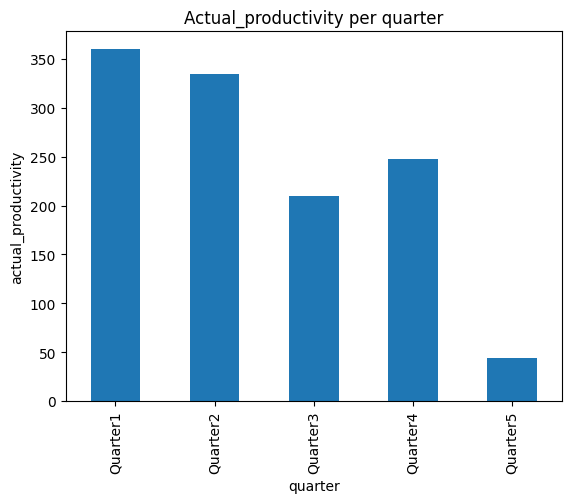

In [71]:
# plotting a bar graph showing the actual_productivity per quarter
quarter_count.plot(kind='bar')
plt.title('Actual_productivity per quarter')
plt.xlabel('quarter')
plt.ylabel('actual_productivity')

Quarter 1 had the higest productivity  followed by Quarter 2. Quarter 5 had the least productivity

Text(0.5, 0, 'actual_productivity')

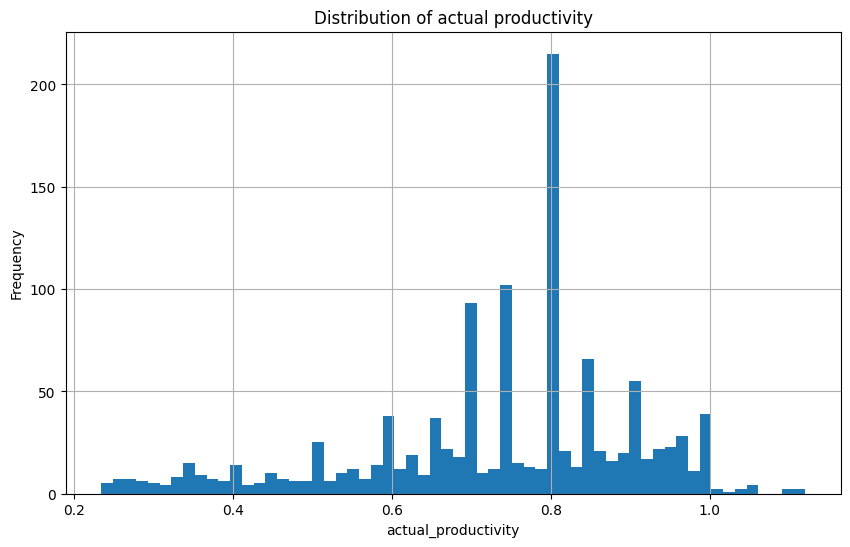

In [72]:
# Looking at a histogram of the actual productivity
fig, ax = plt.subplots(figsize=(10,6))
df['actual_productivity'].hist(bins=60,ax=ax)
plt.ticklabel_format(useOffset= False,style='plain')
plt.title('Distribution of actual productivity')
plt.ylabel('Frequency')
plt.xlabel('actual_productivity')

The highest occuring productivity is 0.8

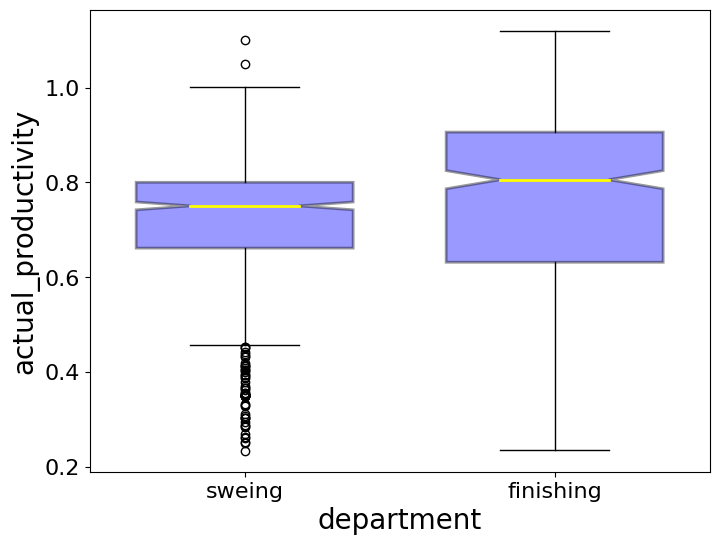

In [73]:
# using box plots
sweing = df.loc[df['department']=='sweing','actual_productivity'].values
finishing = df.loc[df['department']=='finishing','actual_productivity'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
axes.boxplot([sweing,finishing], 
             notch = True, 
             labels=['sweing', 'finishing'],
             widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
             );
plt.xlabel('department', fontsize = 20);
plt.ylabel('actual_productivity', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);            

 

1.   The median for the finishing department is higher than that of sweing meaning that the productivi
2.   The interquartile range for the finishing department is higher than that of sweing
3.   The sweing department has plenty of outliers

In conclusion, the finishing department achieves better productivity than the sweing department





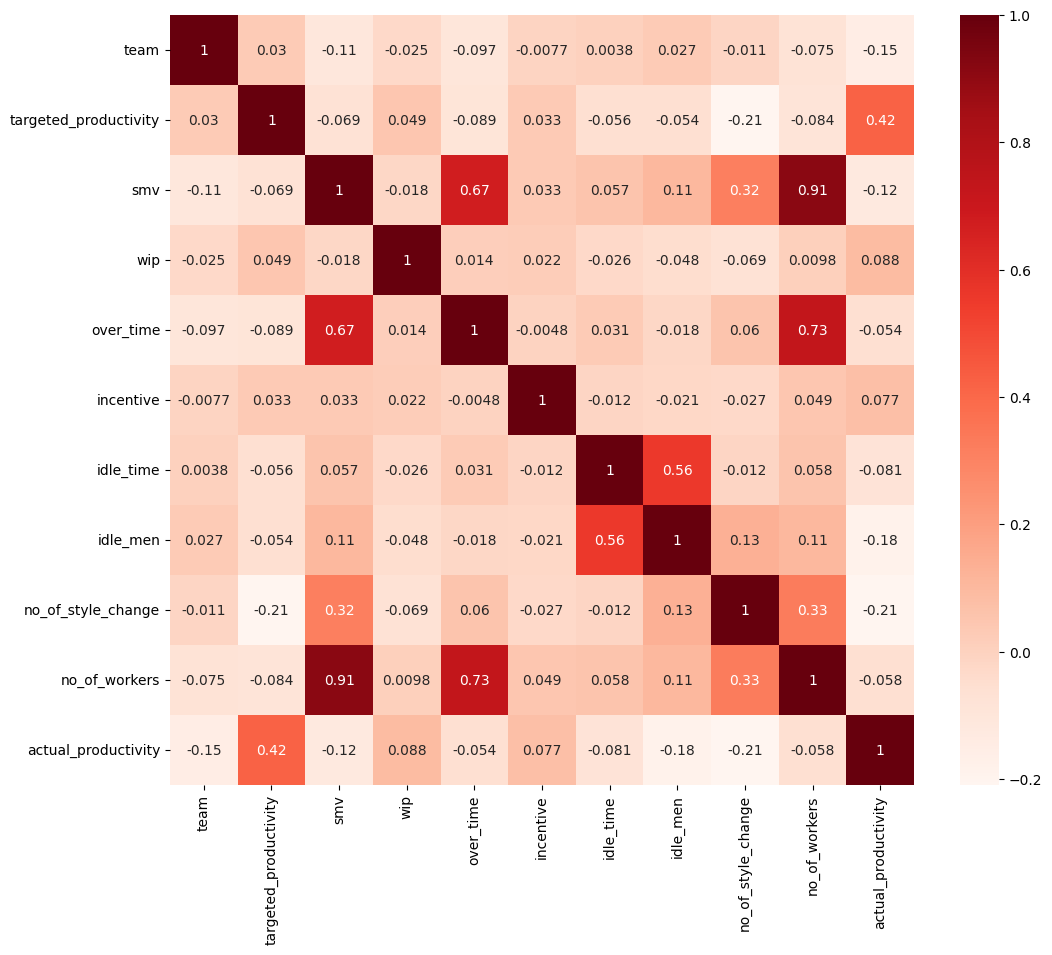

In [74]:
# seeing the correlation of data using heatmaps
corr= df.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, cmap = 'Reds', annot =True);



1.   High correlation between  smv and no_of_workers, overtime and number of workers
2.   Low correlation between targeted_productivity and actual_productivity





Processing the data further for more analysis using KMeans 

In [85]:
# more imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [79]:
# the date column is dropped. I will not be using it for the analysis
# i will focus more on the periods
df=df.drop(columns=['date'])

In [76]:
# checking the value counts in the quarter column
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [81]:
# ordinal encoding the data
df['quarter']= df['quarter'].replace({'Quarter1':0,'Quarter2':1,'Quarter3':2,'Quarter4':3,'Quarter5':4})

In [86]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')



In [89]:

# Instantiating Standard Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)



In [90]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe



Pipeline(steps=[('standardscaler', StandardScaler())])

In [91]:
# Categorical pipeline
categorical_pipe = make_pipeline( ohe)
categorical_pipe


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [92]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14923549d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14923cdc40>)])

In [94]:
# Fitting the preprocessor on the dataset
X_scaled= preprocessor.fit_transform(df)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

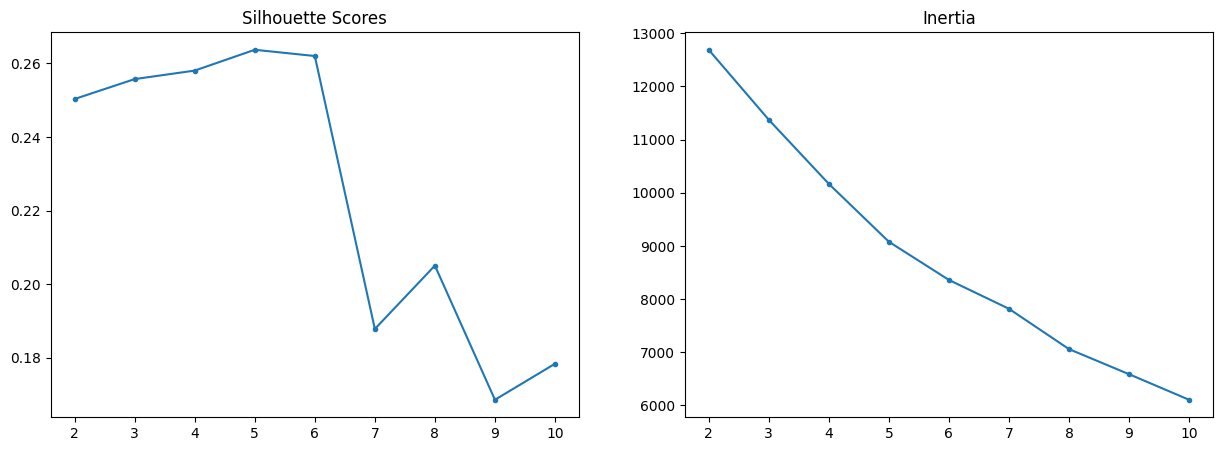

In [97]:
# importing Kmeans and silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Iterating over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils,marker='.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias,marker='.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);



From the above, the elbow is between K=5 and K= 6. The silhouette score for K=5 is highest, so i will take the number of clusters as 5

In [99]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,cluster
0,0,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,0
1,0,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1
2,0,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0
3,0,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0
4,0,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,0


In [100]:
# Grouping the dataframe by cluster and then finding the aggregate mean
# using as_index= false such that the clusters are in column form
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,quarter,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1.231660,6.563707,0.749517,22.572471,1069.395490,6960.675676,50.370656,0.194981,0.115830,0.000000,51.662162,0.760809
1,1,1.407921,6.356436,0.737327,3.921921,1187.302827,1833.623762,29.948515,0.000000,0.000000,0.000000,10.243564,0.752649
2,2,0.000000,6.333333,0.583333,26.206667,532.333333,6620.000000,7.666667,240.000000,32.333333,0.000000,56.833333,0.459432
3,3,0.000000,5.333333,0.800000,21.380000,19409.333333,6190.000000,78.666667,0.000000,0.000000,0.000000,53.583333,0.883638
4,4,1.975758,6.254545,0.643758,25.147939,929.696970,5325.090909,24.406061,0.321212,1.727273,1.090909,54.557576,0.600225


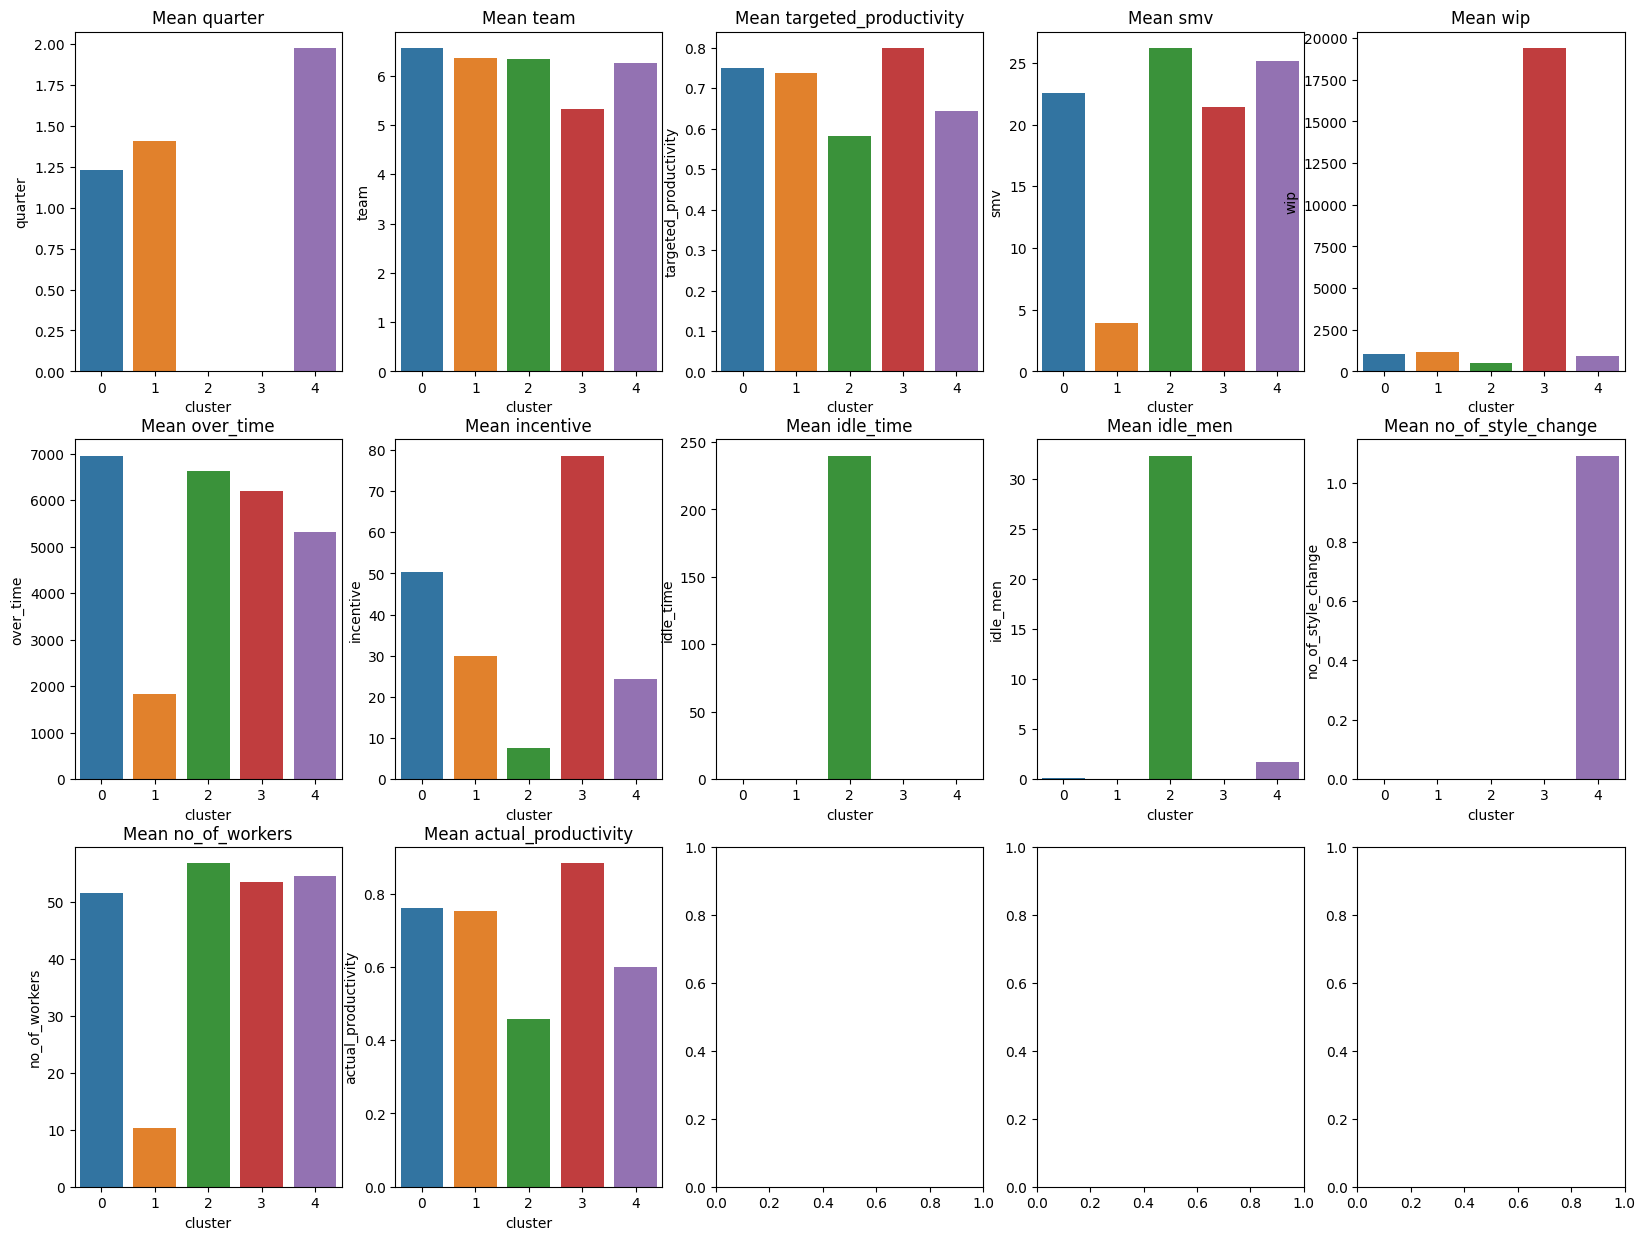

In [102]:
#Using bar graphs to visualize the data
# importing seaborn
import seaborn as sns
fig, axes = plt.subplots(3,5, figsize = (20,15))
# flattening the axes array to one dimension
axes= axes.ravel()
# creating a loop that iterates over each column, starting with column 2
# thex_axis is the clusters and the y-axis is the mean feature for each column
for i, col in enumerate(cluster_groups.columns[1:]):
  sns.barplot(x='cluster', y=col, data=cluster_groups, ax=axes[i])
  axes[i].set_title(f'Mean {col}')



1.   Cluster 0
cluster 0  shows a relatively high actual productivity rate, a high overtime rate, medium incentive, a good number of workers. All of this contributed to  the productivity rate including zero idle time, no idle time and low numbers of stle change
2.   Cluster 1
The actual productivity in cluster 1 is slightly lower than cluster 0. Almost all variables were the same except, that it had very low numbers of workers, mean incentive,mean overtime amd mean smv. This group is actually doing very well despite having fewer personell
3.   Cluster 2
This cluster had the lowest actual productivity, despite having the largest number of workers, highest average overtime. It exhibited the highest idle time and idle men which affects productivity very negatively
4.   Cluster 3
Cluster 3 had the highest average actual productivity and  achieving really high results with the mean wip  and incentive. It is to safe to say that incentives motivated these workers 
5.   Cluster 4
It had a relatively low actual productivity rate compared to the target. The incentives were relatively low and the average number of stylec hange was very high which could have affected performance



